# Competition link:
https://www.kaggle.com/competitions/playground-series-s4e7/overview

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
train.shape

(11504798, 12)

In [6]:
# let's reimport file without ID
train = pd.read_csv('train.csv', index_col=0)

In [7]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [10]:
train.Vehicle_Age.unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [11]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [12]:
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})

In [13]:
for col in list(train.columns):
    print(f'{col}: {train[col].unique()}')

Gender: [0 1]
Age: [21 43 25 35 36 31 23 47 26 66 22 27 24 79 34 20 42 40 50 67 63 46 37 30
 53 32 28 58 48 59 52 39 44 33 41 57 51 45 68 74 29 49 55 61 60 65 54 38
 56 71 62 70 73 64 69 72 78 80 76 75 77 81 83 82 84 85]
Driving_License: [1 0]
Region_Code: [35.  28.  14.   1.  15.  47.  45.   8.  11.   3.  10.  12.  37.  50.
 30.  46.  29.  16.  26.  25.  41.  48.   7.   4.  24.  36.  33.   2.
  9.  27.  18.  43.  49.  17.  13.  38.   6.  21.  23.   0.  19.   5.
 39.  44.  20.  40.  22.  32.  42.  31.  34.  51.  52.  39.2]
Previously_Insured: [0 1]
Vehicle_Age: [1 2 0]
Vehicle_Damage: [1 0]
Annual_Premium: [65101. 58911. 38043. ... 22112. 54335. 64538.]
Policy_Sales_Channel: [124.  26. 152. 156. 160.   8.  31. 157.  60. 122.  15.  30. 147.   1.
  63. 136. 154.  18. 135. 151.   3.  10.  55. 108.   7.  29. 163.  13.
 133. 145.  25.  12. 109.  23.  78.   4. 153. 150. 146. 120. 107. 155.
  61.  14.  45.  11.  19.  24.  52. 132. 125.  59.  16.  22.  56.  20.
 148. 158. 159. 139.   9. 113. 1

In [14]:
train[train.Region_Code == 39.2]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
11370234,1,20,1,39.2,1,0,0,2630.0,159.0,74,0


In [15]:
train = train[train.Region_Code != 39.2]

In [16]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,0,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,1,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,1,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,1,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [17]:
train.Annual_Premium.describe()

count    1.150480e+07
mean     3.046137e+04
std      1.645474e+04
min      2.630000e+03
25%      2.527700e+04
50%      3.182400e+04
75%      3.945100e+04
max      5.401650e+05
Name: Annual_Premium, dtype: float64

In [18]:
Annual_Premium_mean = train.Annual_Premium.mean()
Annual_Premium_std = train.Annual_Premium.std()
print(Annual_Premium_mean, Annual_Premium_std)

30461.372829698776 16454.74387408808


In [19]:
train['z_scores_Annual_Premium'] = train['Annual_Premium'].apply(lambda x: (x - Annual_Premium_mean) / Annual_Premium_std)

In [20]:
import matplotlib.pyplot as plt

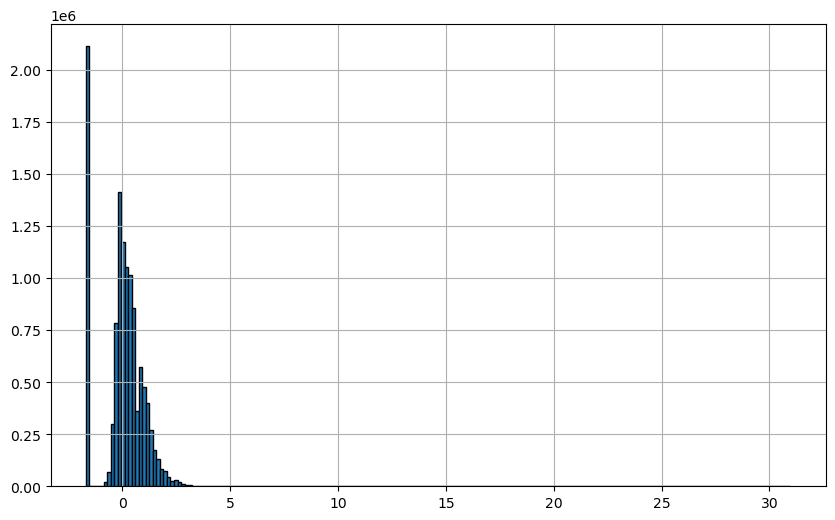

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(train['z_scores_Annual_Premium'], bins=200, edgecolor='black')
plt.grid(True)
plt.show()

In [22]:
train[train['z_scores_Annual_Premium'] > 2].shape

(175520, 12)

In [23]:
train[abs(train['z_scores_Annual_Premium']) < 5].shape

(11503038, 12)

In [24]:
11503038 / train.shape[0]

0.9998471072544782

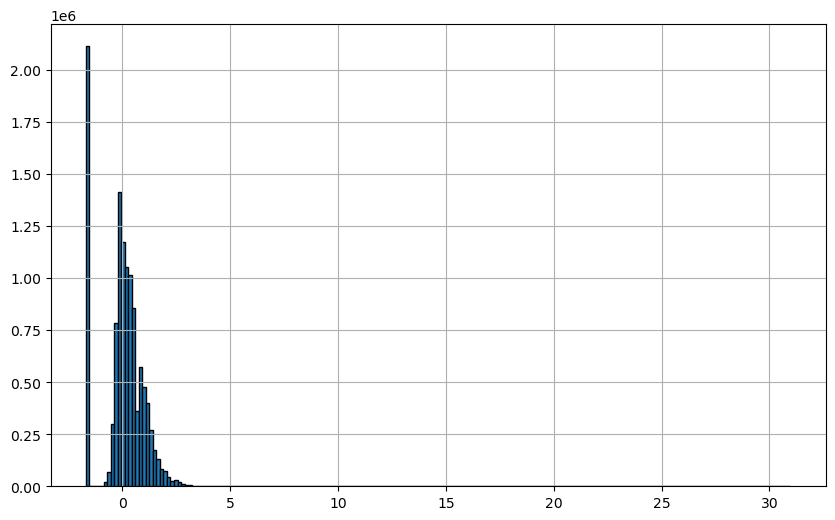

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(train['z_scores_Annual_Premium'], bins=200, edgecolor='black')
plt.grid(True)
plt.show()

In [26]:
#### smth funny going on

In [27]:
train[train['z_scores_Annual_Premium'] < -1.5].shape

(2112872, 12)

In [28]:
2112872/train.shape[0]

0.1836513934144166

In [29]:
train[train['z_scores_Annual_Premium'] < -1.5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,z_scores_Annual_Premium
id,,,,,,,,,,,,
3,1,35,1,1.0,0,1,1,2630.0,156.0,76,0,-1.691389
9,1,66,1,11.0,0,1,1,2630.0,26.0,125,0,-1.691389
11,1,25,1,10.0,0,0,1,2630.0,152.0,30,0,-1.691389
20,1,34,1,50.0,1,1,0,2630.0,8.0,169,0,-1.691389
28,0,40,1,35.0,0,1,1,2630.0,157.0,204,1,-1.691389
...,...,...,...,...,...,...,...,...,...,...,...,...
11504771,0,32,1,44.0,0,1,1,2630.0,26.0,270,0,-1.691389
11504773,0,43,1,15.0,0,1,1,2630.0,26.0,287,0,-1.691389
11504788,0,66,1,3.0,1,1,0,2630.0,152.0,74,0,-1.691389


In [30]:
# ig it's fine, they just not getting insurance:)

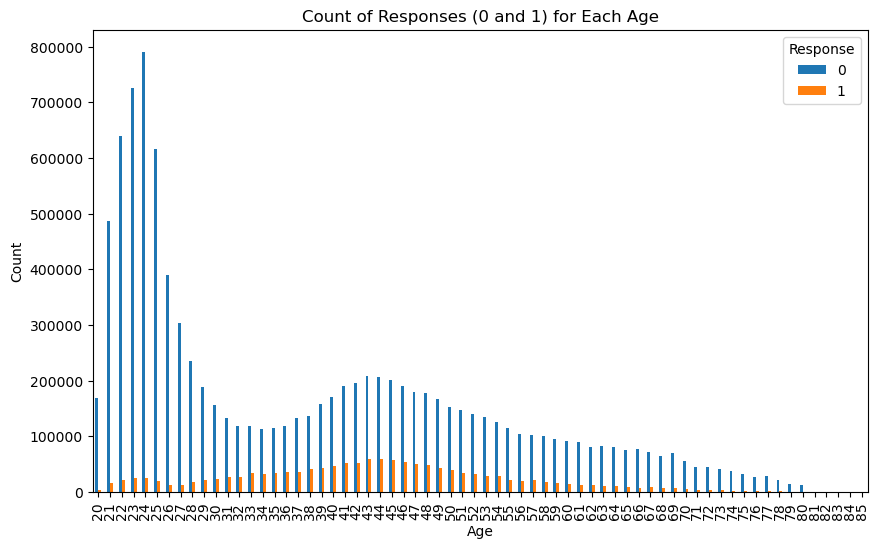

In [31]:
age_response_counts = train.groupby(['Age', 'Response']).size().unstack(fill_value=0)

# Plotting
ax = age_response_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of Responses (0 and 1) for Each Age')
plt.xticks(rotation=90)
plt.legend(title='Response', labels=['0', '1'])
plt.show()

In [32]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'z_scores_Annual_Premium'],
      dtype='object')

In [33]:
dummies = pd.get_dummies(train['Region_Code'], dtype=float, drop_first=True, prefix='Region_Code')
train.drop(columns=['Region_Code'], inplace=True)
train = train.join(dummies)
# train.dropna(inplace=True)

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

In [35]:
y_train = train['Response'].astype(float)
X_train = train.drop(['Response', 'z_scores_Annual_Premium'], axis=1)

In [36]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
y_weights = class_weight.compute_class_weight('balanced', classes=[0.0, 1.0], y=y_train)
y_weights_dict = {0.0: y_weights[0], 1.0: y_weights[1]}

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2 ,random_state=47)

In [54]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=128, validation_data=(X_test, y_test))
model.summary()
model.save('model.keras')

Epoch 1/5
71905/71905 ━━━━━━━━━━━━━━━━━━━━ 84s 1ms/step - accuracy: 0.8764 - loss: 0.2832 - val_accuracy: 0.8773 - val_loss: 0.2782
Epoch 2/5
71905/71905 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step - accuracy: 0.8769 - loss: 0.2734 - val_accuracy: 0.8773 - val_loss: 0.2719
Epoch 3/5
71905/71905 ━━━━━━━━━━━━━━━━━━━━ 82s 1ms/step - accuracy: 0.8770 - loss: 0.2732 - val_accuracy: 0.8773 - val_loss: 0.2794
Epoch 4/5
71905/71905 ━━━━━━━━━━━━━━━━━━━━ 84s 1ms/step - accuracy: 0.8766 - loss: 0.2734 - val_accuracy: 0.8773 - val_loss: 0.2747
Epoch 5/5
71905/71905 ━━━━━━━━━━━━━━━━━━━━ 86s 1ms/step - accuracy: 0.8767 - loss: 0.2732 - val_accuracy: 0.8773 - val_loss: 0.2768


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,741 (338.84 KB)

 Trainable params: 28,913 (112.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,828 (225.89 KB)

In [67]:
from sklearn.metrics import roc_curve, auc

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(np.array(X_test)).flatten())
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

71905/71905 ━━━━━━━━━━━━━━━━━━━━ 16s 217us/step


In [69]:
optimal_threshold

0.22990493

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
# rf_params = {
#     'n_estimators': [20, 50],
#     'max_depth': [20],
#     'min_samples_split': [10],
#     'min_samples_leaf': [2]
# }
# 
# 
# rf_clf = RandomForestClassifier(random_state=42)
# rf_grid_search = GridSearchCV(rf_clf, rf_params, cv=3, scoring='accuracy', verbose=1, n_jobs=5)
# rf_grid_search.fit(X_train, y_train)

In [58]:
# best_rf = rf_grid_search.best_estimator_
# best_rf


In [59]:
test = pd.read_csv('test.csv', index_col=0)

In [60]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
test['Vehicle_Age'] = test['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})
test_Annual_Premium_mean = test.Annual_Premium.mean()
test_Annual_Premium_std = test.Annual_Premium.std()
test['z_scores_Annual_Premium'] = test['Annual_Premium'].apply(lambda x: (x - test_Annual_Premium_mean) / test_Annual_Premium_std)
test.drop(columns=['z_scores_Annual_Premium'], inplace=True)

dummies = pd.get_dummies(test['Region_Code'], dtype=float, drop_first=True, prefix='Region_Code')
test.drop(columns=['Region_Code'], inplace=True)
test = test.join(dummies)

In [61]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')
predictions = model.predict(scaler.fit_transform(test))
predictions = pd.DataFrame(predictions, index=test.index, columns=['Response'])

239684/239684 ━━━━━━━━━━━━━━━━━━━━ 52s 217us/step


In [72]:
predictions_opt = predictions.copy()
predictions_opt['Response'] = predictions_opt.Response.apply(lambda x: 1 if x > optimal_threshold else 0)
predictions_opt.reset_index().to_csv('predictions_opt.csv', index=False)

In [73]:
predictions_opt

,Response
id,
11504798,0
11504799,1
11504800,1
11504801,0
11504802,0
...,...
19174659,1
19174660,0
19174661,0


In [66]:
# rf_val_predictions = best_rf.predict(test)
# rf_val_predictions = pd.DataFrame(rf_val_predictions, index=test.index, columns=['Response'])
# rf_val_predictions.to_csv('rf_val_predictions_2.csv')